# Tutorial 5.1: Modal superposition of a jacket wind turbine

In this tutorial we will use the model defined in tutorial 6 to apply the modal superposition technique in a simplified jacket wind turbine. We assume that the structure can be modelled as a space frame with structural elements that are subject to axial displacement and bending. Therefore, the equations of motion at a given element are given by: 

$$ \rho A \frac{\partial^2 u (x,t)}{\partial t^2} - E A \frac{\partial^2 u(x,t)}{\partial x^2} = q_u(x) $$

$$ \rho A \frac{\partial^2 v (x,t)}{\partial t^2} + E I \frac{\partial^4 v(x,t)}{\partial x^4} = q_v(x) $$

In the following figure we have a sketch of the simplified geometry that will be used in this example.

![figure](tutorial8_figure.png)


## Step 0: input parameters

Let's start by setting some parameters:

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Error processing line 7 of C:\Users\rubde\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\rubde\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [2]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


Error processing line 7 of C:\Users\rubde\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\rubde\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scp

# Input parameters
# Nacelle
Mass_Nacelle = 5000             # [kg]

# Pile
m_Pile = 1000                   # [kg/m]
EI_Pile = 1e9                   # [N.m2]
EA_Pile = 1e8                   # [N]
H_Pile = 100                    # [m]

# Jacket
m_Jacket = 100                  # [kg/m]
EI_Jacket = 1e7                 # [N.m2]
EA_Jacket = 1e6                 # [N]
H_Jacket = 70                   # [m]
Base_Jacket = 30.23             # [m]
Top_Jacket = 16.13              # [m]

# Define load parameters
f0 = 2                          # [Hz]
A0 = 0.1                        # [m]
T0 = 20                         # [s]

# Define output time vector
dt = 0.01                       # [s]
T = np.arange(0, 5*T0, dt)
nT = len(T)

## Step 1: discretize the domain 

As done in tutorial 6, we start by discretizing the domain. We will discretize the structure using 21 nodes, as depicted in the following figure.

![figure](tutorial8_figure2.png)

Here we first define a matrix with the nodal coordinates.


In [2]:
# Define node coordinates
NodeCoord = ([-(Base_Jacket*4+Top_Jacket*0)/4/2,      -4*H_Jacket/4],  # Point 1
              [(Base_Jacket*4+Top_Jacket*0)/4/2,      -4*H_Jacket/4],  # Point 2
             [-(Base_Jacket*3+Top_Jacket*1)/4/2,      -3*H_Jacket/4],  # Point 3
              [(Base_Jacket*3+Top_Jacket*1)/4/2,      -3*H_Jacket/4],  # Point 4
             [-(Base_Jacket*2+Top_Jacket*2)/4/2,      -2*H_Jacket/4],  # Point 5
              [(Base_Jacket*2+Top_Jacket*2)/4/2,      -2*H_Jacket/4],  # Point 6
             [-(Base_Jacket*1+Top_Jacket*3)/4/2,      -1*H_Jacket/4],  # Point 7
              [(Base_Jacket*1+Top_Jacket*3)/4/2,      -1*H_Jacket/4],  # Point 8
             [-(Base_Jacket*0+Top_Jacket*4)/4/2,       0*H_Jacket/4],  # Point 9
                                             [0,       0*H_Jacket/4],  # Point 10
              [(Base_Jacket*0+Top_Jacket*4)/4/2,       0*H_Jacket/4],  # Point 11
                                             [0,                 10],  # Point 12
                                             [0,                 20],  # Point 13
                                             [0,                 30],  # Point 14
                                             [0,                 40],  # Point 15
                                             [0,                 50],  # Point 16
                                             [0,                 60],  # Point 17
                                             [0,                 70],  # Point 18
                                             [0,                 80],  # Point 19
                                             [0,                 90],  # Point 20
                                             [0,                100])  # Point 21
nNode = len(NodeCoord)

Once we have the node coordinates we proceed to define the elemental connectivities. Here, we will use the same array to assign the material properties to each element. Note that they are different depending on which part of the structure they belong to.

In [3]:
# Define elements (and their properties
#             NodeLeft    NodeRight          m         EA        EI
Elements = (         [1,            3,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [1,            4,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [2,            4,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [3,            4,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [3,            5,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [5,            4,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [4,            6,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [5,            6,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [5,            7,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [5,            8,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [6,            8,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [7,            8,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [7,            9,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [9,            8,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [8,           11,   m_Jacket,  EA_Jacket, EI_Jacket],
                     [9,           10,   m_Jacket,  EA_Jacket, EI_Jacket],
                    [10,           11,   m_Jacket,  EA_Jacket, EI_Jacket],
                    [10,           12,   m_Pile,    EA_Pile,   EI_Pile],
                    [12,           13,   m_Pile,    EA_Pile,   EI_Pile],
                    [13,           14,   m_Pile,    EA_Pile,   EI_Pile],
                    [14,           15,   m_Pile,    EA_Pile,   EI_Pile],
                    [15,           16,   m_Pile,    EA_Pile,   EI_Pile],
                    [16,           17,   m_Pile,    EA_Pile,   EI_Pile],
                    [17,           18,   m_Pile,    EA_Pile,   EI_Pile],
                    [18,           19,   m_Pile,    EA_Pile,   EI_Pile],
                    [19,           20,   m_Pile,    EA_Pile,   EI_Pile],
                    [20,           21,   m_Pile,    EA_Pile,   EI_Pile])
nElem = len(Elements)

Let's plot the structure to make sure that it looks like the model in the figure.

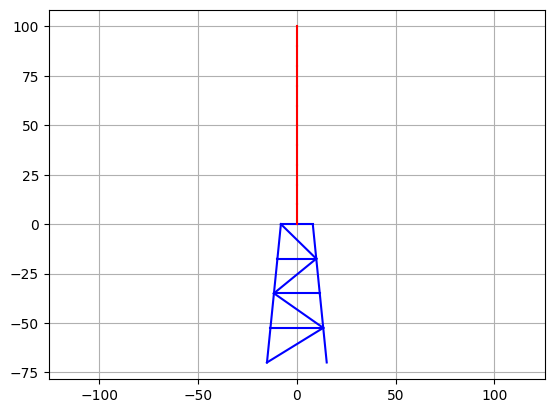

In [4]:
plt.figure()
for iElem in np.arange(0, nElem):
    NodeLeft = Elements[iElem][0]-1
    NodeRight = Elements[iElem][1]-1
    m = Elements[iElem][2]
    EA = Elements[iElem][3]
    EI = Elements[iElem][4]
    if m == m_Jacket and EA == EA_Jacket and EI == EI_Jacket:
        c = 'b'
    elif m == m_Pile and EA == EA_Pile and EI == EI_Pile:
        c = 'r'
    else:
        print("ERROR: unknown material. Check your inputs.")
        break
    plt.plot([NodeCoord[NodeLeft][0], NodeCoord[NodeRight][0]], [NodeCoord[NodeLeft][1], NodeCoord[NodeRight][1]], c=c)
plt.axis('equal')
plt.grid()

## Step 2: define the shape functions

Here we will use the exact same functions as in tutorial 4 and 5. Linear shape functions for the axial displacement and cubic shape functions for the deflection and rotations. Since we already know its expression and we already have the value of the elemental matrices, we skip this step in this tutorial. 

## Step 3: computation of the elemental matrices

In the theory we have seen that the mass and stiffness elemental matrices for the space frame using linear and cubic shape functions are given by:

$$ \bold{M} = \frac{mL}{420} \begin{bmatrix} 140 & 0 & 0 & 70 & 0 & 0 \\ 0 & 156 & 22L & 0 & 54 & -13L \\ 0 & 22L & 4L^2 & 0 & 13L & -3L^2 \\ 70 & 0 & 0 & 140 & 0 & 0 \\ 0 & 54 & 13L & 0 & 156 & -22L \\ 0 & -13L & -3L^2 & 0 & -22L & 4L^2 \end{bmatrix} $$
$$ \quad \bold{K} = \begin{bmatrix} \frac{EA}{L} & 0 & 0 & \frac{-EA}{L} &  0 & 0 \\ 0 & \frac{12EI}{L^3} & \frac{6EI}{L^2} & 0 & \frac{-12EI}{L^3} & \frac{6EI}{L^2} \\ 0 & \frac{6EI}{L^2} & \frac{4EI}{L} & 0 & \frac{-6EI}{L^2} & \frac{2EI}{L} \\ \frac{-EA}{L} & 0 & 0 & \frac{EA}{L} & 0 & 0 \\ 0 & \frac{-12EI}{L^3} & \frac{-6EI}{L^2} & 0 & \frac{12EI}{L^3} & \frac{-6EI}{L^2} \\ 0 & \frac{6EI}{L^2} & \frac{2EI}{L} & 0 & \frac{-6EI}{L^2} & \frac{4EI}{L} \end{bmatrix}$$

These matrices are used directly when calling the `BeamMatrices` function within the assembly process.

## Step 4: global assembly

The last step is to compute the global matrices and the global forcing vector. We start by initializing the global matrices as 1-dimensional arrays.

In [5]:
nDof = 3*nNode              # 3 Degrees of freedom per node
K = np.zeros((nDof*nDof))
M = np.zeros((nDof*nDof))

Then we loop over elements and perform all the elemental operations.

In [6]:
from BeamMatrices import BeamMatricesJacket
for iElem in np.arange(0, nElem):
    # Get the nodes of the elements
    NodeLeft = Elements[iElem][0]-1
    NodeRight = Elements[iElem][1]-1
    
    # Get the degrees of freedom that correspond to each node
    Dofs_Left = 3*(NodeLeft) + np.arange(0, 3)
    Dofs_Right = 3*(NodeRight) + np.arange(0, 3)

    # Get the properties of the element
    m = Elements[iElem][2]
    EA = Elements[iElem][3]
    EI = Elements[iElem][4]

    # Calculate the matrices of the element
    Me, Ke = BeamMatricesJacket(m, EA, EI, ([NodeCoord[NodeLeft][0], NodeCoord[NodeLeft][1]], [NodeCoord[NodeRight][0], NodeCoord[NodeRight][1]]))

    # Assemble the matrices at the correct place
    nodes = np.append(Dofs_Left, Dofs_Right)
    for i in np.arange(0, 6):
        for j in np.arange(0, 6):
            ij = nodes[j] + nodes[i]*nDof
            print(ij)
            #print(ij)
            M[ij] = M[ij] + Me[i, j]
            K[ij] = K[ij] + Ke[i, j]
            
# Reshape the global matrix from a 1-dimensional array to a 2-dimensional array
M = M.reshape((nDof, nDof))
K = K.reshape((nDof, nDof))

0
1
2
6
7
8
63
64
65
69
70
71
126
127
128
132
133
134
378
379
380
384
385
386
441
442
443
447
448
449
504
505
506
510
511
512
0
1
2
9
10
11
63
64
65
72
73
74
126
127
128
135
136
137
567
568
569
576
577
578
630
631
632
639
640
641
693
694
695
702
703
704
192
193
194
198
199
200
255
256
257
261
262
263
318
319
320
324
325
326
570
571
572
576
577
578
633
634
635
639
640
641
696
697
698
702
703
704
384
385
386
387
388
389
447
448
449
450
451
452
510
511
512
513
514
515
573
574
575
576
577
578
636
637
638
639
640
641
699
700
701
702
703
704
384
385
386
390
391
392
447
448
449
453
454
455
510
511
512
516
517
518
762
763
764
768
769
770
825
826
827
831
832
833
888
889
890
894
895
896
768
769
770
765
766
767
831
832
833
828
829
830
894
895
896
891
892
893
579
580
581
576
577
578
642
643
644
639
640
641
705
706
707
702
703
704
576
577
578
582
583
584
639
640
641
645
646
647
702
703
704
708
709
710
954
955
956
960
961
962
1017
1018
1019
1023
1024
1025
1080
1081
1082
1086
1087
1088
768
769
770
77

Now we have the global mass and stiffness matrices. However, in this example we have an additional point mass at the top corresponding to the nacelle. Then, we need to account for this mass adding its value at the corresponding DOFs, in this case the corresponding horizontal and vertical displacements associated to the top node.

In [9]:
nacelle_node = nNode
nacelle_dof_h = 3*(nacelle_node-1)
nacelle_dof_v = 3*(nacelle_node-1)+1
M[nacelle_dof_h, nacelle_dof_h] += Mass_Nacelle
M[nacelle_dof_v, nacelle_dof_v] += Mass_Nacelle

That completes the filling of the matrices. Let's have a look at the matrices' structure.

Text(0.5, 1.0, 'Stiffness matrix')

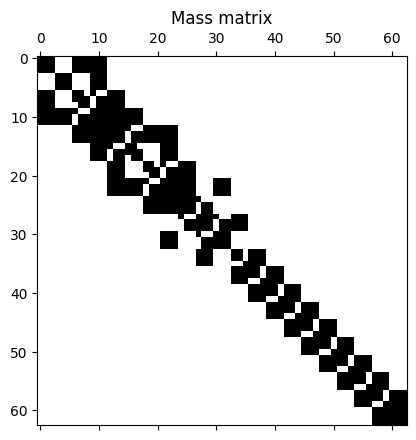

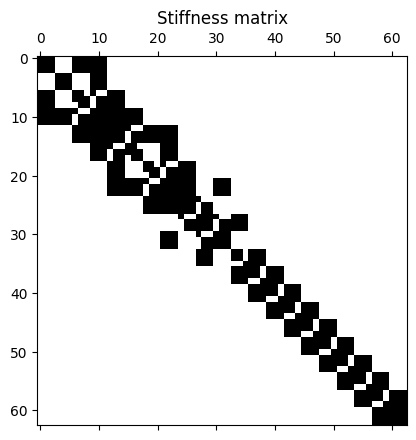

In [10]:
# Look at the matrix structure
plt.figure()
plt.spy(M)
plt.title("Mass matrix")
plt.figure()
plt.spy(K)
plt.title("Stiffness matrix")


To apply the boundary conditions, we will remove the rows associated to the fixed DOFs and add the contribution to the right-hand-side. First, we obtain the free and fixed DOFs.

In [11]:
DofsP = np.arange(0, 6)          # prescribed DOFs
DofsF = np.arange(0, nDof)       # free DOFs
DofsF = np.delete(DofsF, DofsP)  # remove the fixed DOFs from the free DOFs array

# free & fixed array indices
fx = DofsF[:, np.newaxis]
fy = DofsF[np.newaxis, :]
bx = DofsP[:, np.newaxis]
by = DofsP[np.newaxis, :]

We can re-order the matrices and vectors in blocks, such that it's easy to operate with the blocks corresponding with the fixed DOFs.

In [12]:
# Mass
M_FF = M[fx, fy]
M_FP = M[fx, by]
M_PF = M[bx, fy]
M_PP = M[bx, by]

# Stiffness
K_FF = K[fx, fy]
K_FP = K[fx, by]
K_PF = K[bx, fy]
K_PP = K[bx, by]

## Step 5: modal analysis

Using the matrices associated to the free DOFs, we can perform a modal analysis to get more information on how the structure will deform and determine the natural frequencies.

$$ ( \bold{K}_{FF} - \omega^2 \bold{M}_{FF} ) \bold{\phi} = \bold{0} $$

To compute the natural frequencies and mode shapes we use the `eig` command, which is part of the NumPy package. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [13]:
mat = np.dot(np.linalg.inv(M_FF), K_FF)
w2, vr = np.linalg.eig(mat)
w = np.sqrt(w2.real)
f = w/2/np.pi
len(f)

57

We sort the frequencies and mode shapes in descending order:

In [14]:
idx = f.argsort()#[::-1]  
f = f[idx]
vr_sorted = vr[:,idx]
ModalShape = np.zeros((nDof, len(f)))
ModalShape[6:, :] = vr_sorted
print(f)
print(vr_sorted[0:3])

[9.54670111e-03 6.12400478e-02 7.75951782e-02 2.22949413e-01
 3.41345804e-01 4.24175667e-01 5.45009096e-01 7.69380633e-01
 8.14514689e-01 8.57705614e-01 9.47721139e-01 1.08114083e+00
 1.15063104e+00 1.17208793e+00 1.29333981e+00 1.33214984e+00
 1.44940212e+00 1.50553079e+00 1.55474526e+00 1.76464968e+00
 1.91842048e+00 2.08594743e+00 2.14069101e+00 2.32322832e+00
 2.35579594e+00 2.70275589e+00 2.92565010e+00 3.06666475e+00
 3.07553042e+00 3.36698471e+00 4.06769028e+00 4.56639585e+00
 4.65540181e+00 5.81120726e+00 6.33664968e+00 6.40680246e+00
 8.07906009e+00 8.36924789e+00 8.90929311e+00 1.01871294e+01
 1.11301362e+01 1.22374634e+01 1.39232828e+01 1.42777068e+01
 1.60290031e+01 1.71255228e+01 1.83798075e+01 2.19487233e+01
 2.65011954e+01 3.18487149e+01 3.80827564e+01 4.53131189e+01
 5.35692736e+01 6.26091513e+01 7.15737540e+01 7.87706273e+01
 8.07864878e+01]
[[-5.63304080e-03  5.65903825e-02 -1.01178027e-02  2.56211115e-01
   2.40821822e-01  1.03029030e-01 -4.52813644e-01  1.00625939e-

Let's see what these modes look like. Here, we plot the first 9 modes. Note that the system will have 19 x 3 = 57 modes (as many as the discrete system DOFs).

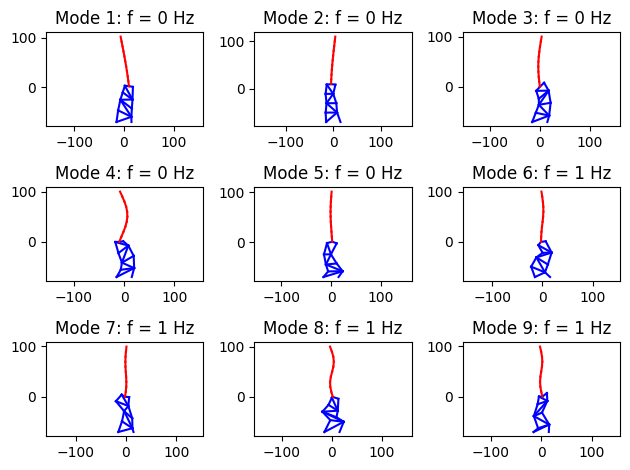

In [15]:
nMode = 9
plt.figure()
nCol = int(np.round(np.sqrt(nMode)))
nRow = int(np.ceil(nMode/nCol))
for iMode in np.arange(1, nMode + 1):
    plt.subplot(nRow, nCol, iMode)
    Shape = ModalShape[:, iMode]

    # Scale the mode such that maximum deformation is 10
    MaxTranslationx = np.max(np.abs(Shape[0::3]))
    MaxTranslationy = np.max(np.abs(Shape[1::3]))
    Shape[0::3] = Shape[0::3]/MaxTranslationx*10
    Shape[1::3] = Shape[1::3]/MaxTranslationy*10

    # Get the deformed shape
    DisplacedNode = ([i[0] for i in NodeCoord] + Shape[0::3], [i[1] for i in NodeCoord] + Shape[1::3])
    for iElem in np.arange(0, nElem):
        NodeLeft = Elements[iElem][0]-1
        NodeRight = Elements[iElem][1]-1
        m = Elements[iElem][2]
        EA = Elements[iElem][3]
        EI = Elements[iElem][4]
        if m == m_Jacket and EA == EA_Jacket and EI == EI_Jacket:
            c = 'b'
        elif m == m_Pile and EA == EA_Pile and EI == EI_Pile:
            c = 'r'
        else:
            print("ERROR: unknown material. Check your inputs.")
            break
        plt.plot([DisplacedNode[0][NodeLeft], DisplacedNode[0][NodeRight]], 
                    [DisplacedNode[1][NodeLeft], DisplacedNode[1][NodeRight]], c=c)
    plt.title("Mode "+str(iMode)+": f = "+str(round(f[iMode]))+" Hz")
    plt.axis('equal')

# automatically fix subplot spacing
plt.tight_layout()

## Step 6: calculate modal quantities

Now we want to compute the mass and stiffness coefficients that go on the diagonal of the respective mode, $m_{ii}$ and $k_{ii}$. Here, we also compute the contribution from the external force, inluding the effect of the boundary conditions, $f_i^{eq}$. 

$$ \begin{bmatrix} m_{11} \ddot{\Gamma}_1 \\ m_{22} \ddot{\Gamma}_2 \\ \vdots \\ m_{NN} \ddot{\Gamma}_N \end{bmatrix} + \begin{bmatrix} k_{11} \Gamma_1 \\ k_{22} \Gamma_2 \\ \vdots \\ k_{NN} \Gamma_N \end{bmatrix} = \begin{bmatrix} f_1^{eq} \\ f_2^{eq} \\ \vdots \\ f_N^{eq} \end{bmatrix} \rightarrow \begin{cases} m_{11}\ddot{\Gamma}_1 + k_{11}\Gamma_1 = f_1^{eq} \\ m_{22}\ddot{\Gamma}_2 + k_{22}\Gamma_2 = f_2^{eq} \\ \qquad \qquad \vdots \\ m_{NN}\ddot{\Gamma}_N + k_{NN}\Gamma_N = f_N^{eq} \end{cases} $$ 

Additionally, we also add damping into the system. In that case we use the modal damping ratio approach, with a damping ratio of 1% ($\xi_j=0.01$).

$$ c_{jj} = \xi_j c_{cr,j} = 2 \xi_j \sqrt{m_{jj}k_{jj}} $$

This will lead to a final system:

$$ \begin{cases} m_{11}\ddot{\Gamma}_1 + c_{11}\dot{\Gamma}_1 + k_{11}\Gamma_1 = f_1^{eq} \\ m_{22}\ddot{\Gamma}_2 + c_{22}\dot{\Gamma}_2 + k_{22}\Gamma_2 = f_2^{eq} \\ \qquad \qquad \vdots \\ m_{NN}\ddot{\Gamma}_N + c_{NN}\dot{\Gamma}_N + k_{NN}\Gamma_N = f_N^{eq} \end{cases} $$ 

**Attention**: we are calculating all the modes, but in general this shouldn't be the case. You should only calculate the response for these modes that you want to consider. Here, we are calculating all modes, because we will compare the "reduced" and the "full" response. To consider only a few, you should replace `nMode` by the number of modes you wish to consider.

In [16]:
nMode = 9#len(f)
PHI = vr_sorted[:,0:nMode]

Mm = np.zeros(nMode)
Km = np.zeros(nMode)
Cm = np.zeros(nMode)
ModalDampRatio = 0.01
# Compute your "nMode" entries of the modal mass, stiffness and damping
for iMode in np.arange(0,nMode):
    print('Computing Mode: ',iMode)
    Mm[iMode] = PHI[:,iMode].T @ M_FF @ PHI[:,iMode]
    Km[iMode] = PHI[:,iMode].T @ K_FF @ PHI[:,iMode]
    Cm[iMode] = 2*ModalDampRatio*np.sqrt(Mm[iMode]*Km[iMode])
    print('Mm = ',Mm[iMode],', Km = ', Km[iMode],', Cm = ', Cm[iMode])

Computing Mode:  0
Mm =  9770.858374621661 , Km =  35.155971712019834 , Cm =  11.72184321035478
Computing Mode:  1
Mm =  5878.202857165692 , Km =  870.3127554406257 , Cm =  45.23659989724618
Computing Mode:  2
Mm =  8174.205181928264 , Km =  1943.0086801167504 , Cm =  79.70583823420199
Computing Mode:  3
Mm =  4775.304243274488 , Km =  9370.730498321731 , Cm =  133.7880250414325
Computing Mode:  4
Mm =  5303.9900032874675 , Km =  24397.850714587512 , Cm =  227.51347765956388
Computing Mode:  5
Mm =  4412.846973209377 , Km =  31345.13221456897 , Cm =  235.22012823558143
Computing Mode:  6
Mm =  4040.488162793843 , Km =  47380.656846530306 , Cm =  276.72439945462185
Computing Mode:  7
Mm =  3147.261174568883 , Km =  73548.7034084374 , Cm =  304.2873501657649
Computing Mode:  8
Mm =  3778.954752412473 , Km =  98975.85673441576 , Cm =  386.79466603386174


In [17]:
# Compute the equivalent force (accounting for boundary conditions)

# Define the boundary conditions
def ub(t, T0):
    if t <= T0:
        return A0*np.sin(2*np.pi*f0*t)*np.array([1, 0, 0, 1, 0, 0])
    else:
        return np.array([0, 0, 0, 0, 0, 0])
def dub_dt2(t, T0):
    return -(2*np.pi*f0)**2*ub(t, T0)

def F(t):
    return -PHI.T @ ( K_FP @ ub(t,T0) + M_FP @ dub_dt2(t,T0) )

print(F(20))

[ 5.86853708e-13 -7.86413699e-12  2.16344216e-12 -4.21310947e-11
 -4.31464709e-11 -2.23264004e-11  8.80773774e-11  6.99135454e-12
 -5.90507968e-11]


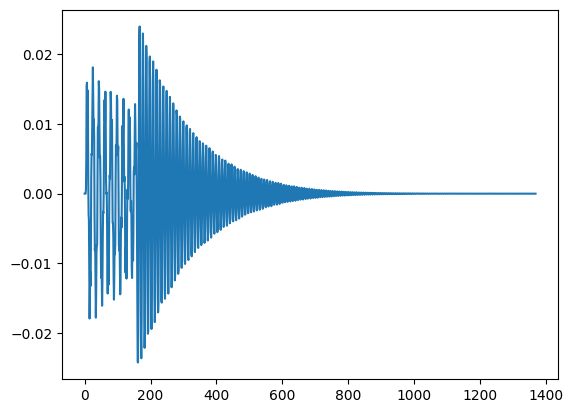

In [18]:
# Solve the resulting ODE:
def qdot(t,q):
    Um = q[0:nMode]
    Vm = q[nMode:2*nMode]
    Am = ( F(t) - (Km * Um + Cm * Vm) ) / Mm
    return np.append(Vm,Am)
q0 = np.zeros(2*nMode)

import scipy.integrate as scpi
q = scpi.solve_ivp(fun=qdot,y0=q0,t_span=[0,400])
plt.plot(q.y[5])

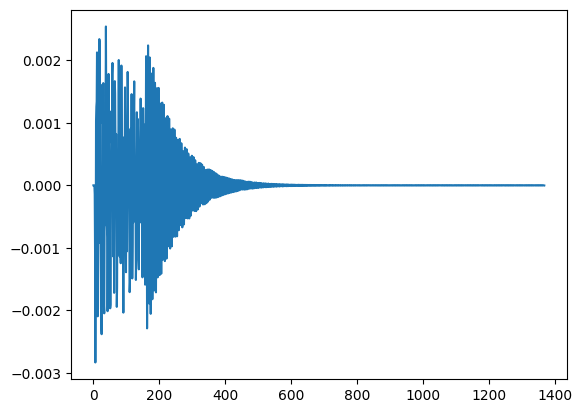

In [19]:
# Show the result on the original coordinates
U_F = np.zeros((len(q.t),len(PHI[:,0])))
for iMode in np.arange(0,nMode):
    for it in np.arange(0,len(q.t)):
        U_F[it,:] = PHI[:,iMode] * q.y[iMode][it]
        
plt.plot(U_F[:,9])